In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# %matplotlib inline

### Creating an array to show the 4x4 UCT Region

In [2]:
# Create a mock data with the values of 4x4 uct region
mock_array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

In [3]:
# Reshape into a 4x4 array
arr_2d = np.reshape(mock_array, (4, 4))
arr_2d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [4]:
# Adjust it based on the positions of our UCT Region
matrix = np.flipud(arr_2d.transpose())

In [5]:
# View the matrix

In [6]:
# Creating a mock matrix with 4 UCTRegions with their positions
positions = np.vstack([np.hstack([matrix, matrix]), np.hstack([matrix, matrix])])

#View
positions

array([[ 3,  7, 11, 15,  3,  7, 11, 15],
       [ 2,  6, 10, 14,  2,  6, 10, 14],
       [ 1,  5,  9, 13,  1,  5,  9, 13],
       [ 0,  4,  8, 12,  0,  4,  8, 12],
       [ 3,  7, 11, 15,  3,  7, 11, 15],
       [ 2,  6, 10, 14,  2,  6, 10, 14],
       [ 1,  5,  9, 13,  1,  5,  9, 13],
       [ 0,  4,  8, 12,  0,  4,  8, 12]])

Plotting the regions on a 2-d plot.

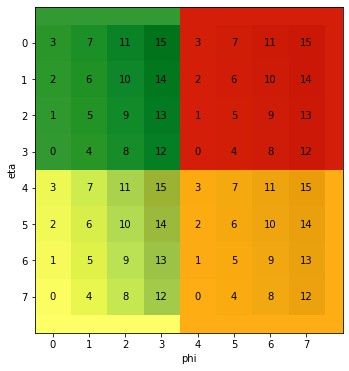

In [7]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(positions, cmap='GnBu', interpolation='nearest')
mat = ax.margins(0) # remove default margins (matplotlib verision 2+)

# Divide 4x4 regions
mat = ax.axhspan(-1, 3.5, facecolor='green', alpha=0.8)
mat = ax.axvspan(3.5, 8, facecolor='red', alpha=0.8)

mat = ax.axhspan(3.5, 8, facecolor='yellow', alpha=0.6)
# mat = ax.axvspan(3.5, 8, 1, 1, facecolor='blue')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(positions.shape[0]))
plt.xticks(range(positions.shape[1]))

# this places the numbers centered in the individual squares
for x in range(positions.shape[0]):
    for y in range(positions.shape[1]):
        ax.annotate(str(positions[x, y]), xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()

We will now get the value of positions as an array.

In [8]:
pos = np.array(positions)

We will now loop through the size of UCT Region to find the list of adjacent border values of positions in both horizontal and vertical spaces.

In [9]:
# size of the region is 4x4
size = 4
horizontal_listnew = []
vertical_listnew = []
for i in range(0,size):
    # Get the border line adjacent elements of the 4x4 region both horizontal and vertical
    horizontal_listnew.append((pos[size-1][i], pos[size][i]))
    vertical_listnew.append((pos[i][size-1], pos[i][size]))

In [10]:
horizontal_listnew

[(0, 3), (4, 7), (8, 11), (12, 15)]

<img src="images/horizontal_val.PNG">

In [11]:
vertical_listnew

[(15, 3), (14, 2), (13, 1), (12, 0)]

<img src="images/vertical_val.PNG">

- We will be using this list to find if any signal bits i.e, Electron = True values have these positions.
- If they do, we will be merging the value of their energy.

### Importing the data

We are using the Electron Region data.

In [12]:
data = pd.read_csv("output_data/ElectronRegionData.csv") # Electron Region

In [13]:
# View the merged data head
data.head()

,event,eta,phi,et,position,electron,tau
0,0,0,0,12.15180,9,0,0
1,0,0,1,10.19040,5,0,0
2,0,0,2,7.06514,6,0,0
3,0,0,3,6.87023,14,0,0
4,0,0,4,5.66144,1,0,0


**Data Dictionary**

- event: Event number (Integer)
- eta: Index of eta coordinate 0-13 (Integer)
- phi: Index of phi coordinate, 0-17, which is also specifies the optical link (Integer)
- et: Transverse energy deposited in the region (Float)
- position: Position of the cluster within the region, a 4-bit number (Integer)
- electron: Electron bit signifying that the region likely has an electron or photon deposit (Bool)
- tau: Tau bit signifying that the region likely has a tau deposit (Bool)

In [14]:
# Check the shape of the merged dataframe
data.shape

(64512, 7)

### Getting data for a single event

We are using the electron region data for the 0th event.

In [15]:
event_data = data.loc[data['event'] == 1]

In [16]:
# View the first five rows of dataframe
event_data.head()

,event,eta,phi,et,position,electron,tau
252,1,0,0,7.23932,3,0,0
253,1,0,1,14.78990,6,0,1
254,1,0,2,8.17547,4,0,1
255,1,0,3,6.89318,2,0,0
256,1,0,4,9.89150,7,0,0


In [17]:
# Number of data values in an event
event_data.shape[0]

252

In [18]:
event_data['position'].unique()

array([ 3,  6,  4,  2,  7,  0,  1, 15, 11, 13,  5,  8, 16, 12,  9, 10, 14],
      dtype=int64)

### Electron values

In [19]:
# Convert the series into a 14x18 matrix
x_elec = np.array(event_data['electron'])
matrix_electron = np.asmatrix(x_elec)

# Resizing into size 14x18
matrix_electron.resize((14, 18))

Plotting the values of matrix on 2D plot

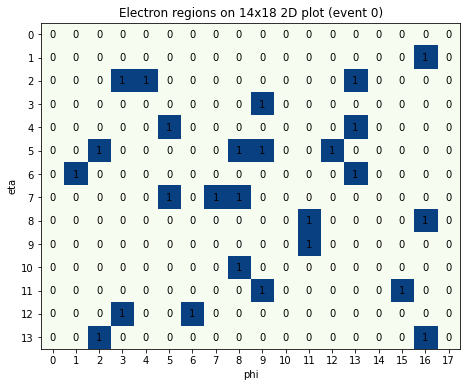

In [20]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_electron, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_electron.shape[0]))
plt.xticks(range(matrix_electron.shape[1]))
plt.title('Electron regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_electron.shape[0]):
    for y in range(matrix_electron.shape[1]):
        ax.annotate(str(matrix_electron[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()

Let us check our code for merging these two region energies in the coordinates **(2,3) and (2,4)**.

<img src="images/test1.PNG">

### Position values

In [21]:
# Convert the series into a 14x18 matrix
x_pos = np.array(event_data['position'])
matrix_position = np.asmatrix(x_pos)

# Resizing into size 14x18
matrix_position.resize((14, 18))

Plotting the values of matrix on 2D plot

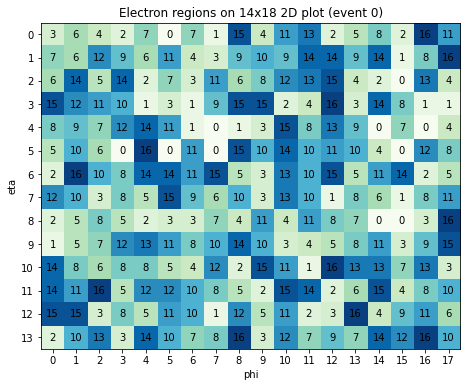

In [22]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_position, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_position.shape[0]))
plt.xticks(range(matrix_position.shape[1]))
plt.title('Electron regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_position.shape[0]):
    for y in range(matrix_position.shape[1]):
        ax.annotate(str(matrix_position[x, y]), xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()

We have set the position of Electron = True to be **(14,2)** which means that both of these bits are neighbours (as shown in our 4x4 UCT region position).

<img src="images/test2.PNG">

### ET values

In [23]:
# Convert the series into a 14x18 matrix
x_et = np.array(event_data['et'])
matrix_et = np.asmatrix(x_et)

# Resizing into size 14x18
matrix_et.resize((14, 18))

In [24]:
cm = sns.light_palette("blue", as_cmap=True)
x = pd.DataFrame(matrix_et)
x = x.style.background_gradient(cmap = cm)
display(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7.239320,14.789900,8.175470,6.893180,9.891500,13.606100,10.897100,6.012840,9.752750,7.069490,13.220500,6.852090,11.317000,11.482900,7.668700,8.398230,7.591360,8.521990
1,9.221080,10.000300,4.493970,6.065050,6.508330,12.996200,11.030700,17.120800,9.071430,14.313200,7.616520,8.841150,15.200500,6.910060,3.243600,11.370400,12.820600,10.932600
2,7.856920,6.765410,9.436460,3.714120,12.435900,13.659300,8.609230,9.635450,11.194600,13.158400,14.928700,9.475270,11.745800,64.328400,7.084730,9.190760,7.136060,6.121010
3,8.386320,11.593400,9.162180,10.681600,12.220700,5.584450,8.858010,11.070200,10.792900,13.351900,6.731560,8.314000,7.285200,12.941900,10.051000,8.543980,12.144300,8.608130
4,12.265900,11.630800,8.209020,13.457200,10.285300,10.505700,13.862200,10.646000,14.419800,14.603500,2.900840,11.047800,8.108450,13.700100,10.743100,9.734700,15.214800,9.746290
5,11.906700,10.060000,8.143620,10.844200,8.635180,6.428400,10.974200,5.485410,13.462400,2.036000,5.921110,4.847520,7.798110,8.714230,16.471700,8.606370,10.417100,11.996100
6,12.768800,11.288000,10.434500,10.184500,12.947400,8.830230,10.233700,10.078200,11.217000,6.925510,6.660820,8.759790,12.084400,5.671570,11.325500,10.575800,5.730280,13.410700
7,6.970480,13.265500,7.213480,10.562200,8.774910,12.374400,5.406840,8.791250,9.650470,8.667000,11.878500,12.053400,10.349400,12.978700,7.947850,16.089800,6.827480,12.923500
8,10.612000,12.959200,12.519400,12.506200,10.626100,8.984040,11.557800,9.539200,13.435300,12.560100,13.310200,8.346750,8.623700,11.045800,11.563600,7.403340,9.626090,12.283500
9,7.478660,7.841210,12.646900,10.933100,13.683200,6.835840,13.471500,13.014700,13.253200,6.948040,11.444200,12.068200,9.780590,15.839600,14.774900,12.855900,10.660600,12.250800


Note here that the values at position **(2,3)** and **(2,4)** have energies **3.714120** and **12.435900** respectively.

### Tau values

In [30]:
# Convert the series into a 14x18 matrix
x_tau = np.array(event_data['tau'])
matrix_tau = np.asmatrix(x_tau)

# Resizing into size 14x18
matrix_tau.resize((14, 18))

Plotting the values of matrix on 2D plot

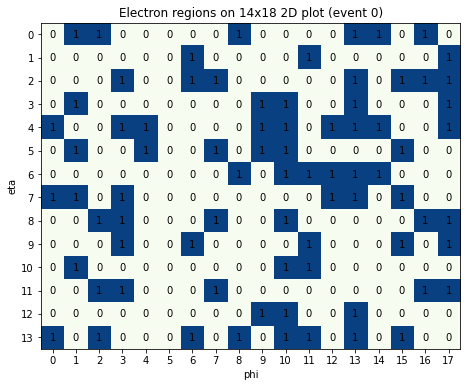

In [31]:
fig, ax = plt.subplots(figsize = (18, 6))
mat = ax.imshow(matrix_tau, cmap='GnBu', interpolation='nearest')

# Set attributes
plt.ylabel("eta")
plt.xlabel("phi")
plt.yticks(range(matrix_tau.shape[0]))
plt.xticks(range(matrix_tau.shape[1]))
plt.title('Electron regions on 14x18 2D plot (event 0)')

# this places 0 or 1 centered in the individual squares
for x in range(matrix_tau.shape[0]):
    for y in range(matrix_tau.shape[1]):
        ax.annotate(str(matrix_tau[x, y])[0], xy=(y, x), 
                    horizontalalignment='center', verticalalignment='center')
plt.show()

### Code to find neighbouring electrons and merge their energies

Find adjacent electron True bits and check if their position matches our horizontal or vertical list of bordering positions.

In [64]:
def find_adjacent_regions(matrix_signal, matrix_energy, matrix_position, horizontal_listnew, vertical_listnew):
    # Set initial value of prev val as 0
    prev_val = 0
    energy_values = np.array(matrix_energy)
    # Loop through rows of the electron values
    for i, row in enumerate(np.array(matrix_signal)):

        # Loop through value of electron in each row of the matrix
        for j, val in enumerate(row):

            # If the signal value is 1
            if val == 1:

                # Check if previous value was also 1
                if val == prev_val:


                    # Get the value of energy (ET) of both the positions
                    pos1 =  matrix_position.item(i, j-1)
                    pos2 =  matrix_position.item(i, j)

                    pos_set = (pos1, pos2)
                    
                    if pos_set in horizontal_listnew or pos_set in vertical_listnew:
                        # Position set lies on the edge of UCT region
                        print("Match found:", pos_set)
                        print("Coord 1: (%s , %s)" % (i, j-1))
                        print("Coord 2: (%s , %s)" % (i, j))
                        # Merge the energies
                        energy_values = merge_energies(matrix_energy, i, j) 

            # Set the value of previous value as current value for next iteration
            prev_val = val
#         return energy_values
    return energy_values

### Function to merge energy (ET)

In [65]:
def merge_energies(matrix_et, i, j):
    """
    Merge the value of energies.
    """
    energy_array = np.array(matrix_et)
    # Get the value of energy (ET) of both the positions
    energy1 =  matrix_et.item(i, j-1)
    energy2 =  matrix_et.item(i, j)
   
    print("Merging energies:")
    print("Energy1:", energy1)
    print("Energy2:", energy2)

    # If the first position contains higher ET, merge the energy of both the positions and save it in that position
    if energy1>energy2:
        energy_array[i, j-1] = energy_array[i, j-1] + energy_array[i, j]
        energy_array[i, j] = 0 # Set ET of next position as 0

    # If the second position contains higher ET, merge the energy of both the positions and save it in that position
    elif energy1<energy2:
        energy_array[i, j] = energy_array[i, j-1] + energy_array[i, j]
        energy_array[i, j-1] = 0 # Set ET of previous position as 0

    # If the ETs are equal, merge the energy of both the positions and save it in left(first) position
    elif energy1==energy2:

        energy_array[i, j-1] = energy_array[i, j-1] + energy_array[i, j]
        energy_array[i, j] = 0 # Set ET of next position as 0
        
    return energy_array

Finding adjacent positions of electron signals and merging 

In [66]:
energy_elec = find_adjacent_regions(matrix_electron, matrix_et, matrix_position, horizontal_listnew, vertical_listnew)

Match found: (14, 2)
Coord 1: (2 , 3)
Coord 2: (2 , 4)
Merging energies:
Energy1: 3.71412
Energy2: 12.4359


Plotting the values of matrix on 2D plot

In [67]:
cm = sns.light_palette("blue", as_cmap=True)
x = pd.DataFrame(energy_elec)
x = x.style.background_gradient(cmap = cm)
display(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7.239320,14.789900,8.175470,6.893180,9.891500,13.606100,10.897100,6.012840,9.752750,7.069490,13.220500,6.852090,11.317000,11.482900,7.668700,8.398230,7.591360,8.521990
1,9.221080,10.000300,4.493970,6.065050,6.508330,12.996200,11.030700,17.120800,9.071430,14.313200,7.616520,8.841150,15.200500,6.910060,3.243600,11.370400,12.820600,10.932600
2,7.856920,6.765410,9.436460,0.000000,16.150020,13.659300,8.609230,9.635450,11.194600,13.158400,14.928700,9.475270,11.745800,64.328400,7.084730,9.190760,7.136060,6.121010
3,8.386320,11.593400,9.162180,10.681600,12.220700,5.584450,8.858010,11.070200,10.792900,13.351900,6.731560,8.314000,7.285200,12.941900,10.051000,8.543980,12.144300,8.608130
4,12.265900,11.630800,8.209020,13.457200,10.285300,10.505700,13.862200,10.646000,14.419800,14.603500,2.900840,11.047800,8.108450,13.700100,10.743100,9.734700,15.214800,9.746290
5,11.906700,10.060000,8.143620,10.844200,8.635180,6.428400,10.974200,5.485410,13.462400,2.036000,5.921110,4.847520,7.798110,8.714230,16.471700,8.606370,10.417100,11.996100
6,12.768800,11.288000,10.434500,10.184500,12.947400,8.830230,10.233700,10.078200,11.217000,6.925510,6.660820,8.759790,12.084400,5.671570,11.325500,10.575800,5.730280,13.410700
7,6.970480,13.265500,7.213480,10.562200,8.774910,12.374400,5.406840,8.791250,9.650470,8.667000,11.878500,12.053400,10.349400,12.978700,7.947850,16.089800,6.827480,12.923500
8,10.612000,12.959200,12.519400,12.506200,10.626100,8.984040,11.557800,9.539200,13.435300,12.560100,13.310200,8.346750,8.623700,11.045800,11.563600,7.403340,9.626090,12.283500
9,7.478660,7.841210,12.646900,10.933100,13.683200,6.835840,13.471500,13.014700,13.253200,6.948040,11.444200,12.068200,9.780590,15.839600,14.774900,12.855900,10.660600,12.250800


We can see that in the coordinate (2,3) and (2,4), the energies have been merged, i.e.,

the values at position **(2,3)** and **(2,4)** had energies as **3.714120** and **12.435900** respectively, which has now been changed to **0** and **16.150020** respectively.

Finding adjacent positions of tau signals and merging 

In [68]:
energy_tau = find_adjacent_regions(matrix_tau, energy_elec, matrix_position, horizontal_listnew, vertical_listnew)

Plotting the values of matrix on 2D plot

In [70]:
cm = sns.light_palette("blue", as_cmap=True)
x = pd.DataFrame(energy_tau)
x = x.style.background_gradient(cmap = cm)
display(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7.239320,14.789900,8.175470,6.893180,9.891500,13.606100,10.897100,6.012840,9.752750,7.069490,13.220500,6.852090,11.317000,11.482900,7.668700,8.398230,7.591360,8.521990
1,9.221080,10.000300,4.493970,6.065050,6.508330,12.996200,11.030700,17.120800,9.071430,14.313200,7.616520,8.841150,15.200500,6.910060,3.243600,11.370400,12.820600,10.932600
2,7.856920,6.765410,9.436460,0.000000,16.150020,13.659300,8.609230,9.635450,11.194600,13.158400,14.928700,9.475270,11.745800,64.328400,7.084730,9.190760,7.136060,6.121010
3,8.386320,11.593400,9.162180,10.681600,12.220700,5.584450,8.858010,11.070200,10.792900,13.351900,6.731560,8.314000,7.285200,12.941900,10.051000,8.543980,12.144300,8.608130
4,12.265900,11.630800,8.209020,13.457200,10.285300,10.505700,13.862200,10.646000,14.419800,14.603500,2.900840,11.047800,8.108450,13.700100,10.743100,9.734700,15.214800,9.746290
5,11.906700,10.060000,8.143620,10.844200,8.635180,6.428400,10.974200,5.485410,13.462400,2.036000,5.921110,4.847520,7.798110,8.714230,16.471700,8.606370,10.417100,11.996100
6,12.768800,11.288000,10.434500,10.184500,12.947400,8.830230,10.233700,10.078200,11.217000,6.925510,6.660820,8.759790,12.084400,5.671570,11.325500,10.575800,5.730280,13.410700
7,6.970480,13.265500,7.213480,10.562200,8.774910,12.374400,5.406840,8.791250,9.650470,8.667000,11.878500,12.053400,10.349400,12.978700,7.947850,16.089800,6.827480,12.923500
8,10.612000,12.959200,12.519400,12.506200,10.626100,8.984040,11.557800,9.539200,13.435300,12.560100,13.310200,8.346750,8.623700,11.045800,11.563600,7.403340,9.626090,12.283500
9,7.478660,7.841210,12.646900,10.933100,13.683200,6.835840,13.471500,13.014700,13.253200,6.948040,11.444200,12.068200,9.780590,15.839600,14.774900,12.855900,10.660600,12.250800


Find if signal is electron or tau.

Next step: Test and try code on multiple kind of data patterns.

### Get 6 electrons

- Get highest 2 electrons in 2x2 regions containing True electron bit.
- Sort them based on their energies

### Reduce the dimensions of the matrix using 2x2 regions max

We will now reduce the dimensions of our matrix from 14x18 to 7x9 using 2x2 region max pooling, i.e., eplacing 2x2 regions by only the highest value of ET (energy).

In [71]:
import skimage.measure

get_electron = skimage.measure.block_reduce(matrix_electron, (2,2), np.max)

In [72]:
get_electron

array([[0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 0],
       [1, 0, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 1]], dtype=int64)

In [76]:
get_electron = skimage.measure.block_reduce(matrix_electron, (2,2), np.argmax())

TypeError: 'numpy.int64' object is not callable